Inspiration from Thu Vu https://github.com/thu-vu92/youtube-api-analysis

In [2]:
#data manipulation
import pandas as pd
import numpy as np
from dateutil import parser
import isodate

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette('colorblind')
%matplotlib inline

#NLP lib
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
#nltk.download('punkt')
from wordcloud import WordCloud

## Reading and Data Preparation/Feature Engineering for channel Data Frame

In [29]:
ch_df = pd.read_csv('channel_df.csv')

In [30]:
ch_df.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
#selecting columns to convert to numeric
cols_to_numeric = ['channel_view','channel_sub','channel_video']

In [32]:
#convert datatypes to numeric
ch_df[cols_to_numeric] = ch_df[cols_to_numeric].apply(pd.to_numeric,errors='coerce')

In [33]:
#change published date to the correct datatype
ch_df['channel_pub_date'] =  ch_df['channel_pub_date'].apply(lambda x: parser.parse(x))

In [35]:
#create view per video channel
ch_df['view_per_video'] = ch_df['channel_view'] / ch_df['channel_video']

In [83]:
#fill missing description
ch_df['channel_desc'].fillna('No Description',inplace=True)

In [82]:
#fill missing location
ch_df['channel_loc'].fillna('No Location',inplace=True)

## Reading and Data Preparation/Feature Engineering for video Data Frame

In [87]:
video_df = pd.read_csv('video_df.csv')

In [88]:
#converting datatypes to numeric
num_cols = ['viewCount', 'likeCount', 'favoriteCount','commentCount']
video_df[num_cols] = video_df[num_cols].apply(pd.to_numeric, errors='coerce')

In [89]:
#applying parser
video_df['publishedAt'] =  video_df['publishedAt'].apply(lambda x: parser.parse(x))

#feature engineering day and month
video_df['publishedDay'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))
video_df['publishedMonth'] = video_df['publishedAt'].apply(lambda x: x.strftime("%m"))

In [90]:
#applying parser
video_df['duration_sec'] = video_df['duration'].apply(lambda x : isodate.parse_duration(x))

#feature enginineering seconds and minutes (rounded)
video_df['duration_sec'] = video_df['duration_sec'].astype('timedelta64[s]')
video_df['duration_min'] = video_df['duration_sec'].apply(lambda x : round(x/60))

In [91]:
#input list brackets into empty tags columns
video_df['tags'].fillna("[]",inplace=True)

In [92]:
#converting tags to list
video_df['tags_list'] = video_df['tags'].apply(lambda x : x.strip("[]").replace("'","").split(', '))

#feature engineering tags count
video_df['tags_count'] = video_df['tags_list'].apply(lambda x : len(x))

In [93]:
#feature engineering like and comments ratio
video_df['likeRatio'] = video_df['likeCount'] / video_df['viewCount'] * 1000
video_df['commentRatio'] = video_df['commentCount'] / video_df['viewCount'] * 1000

In [94]:
#feature engineering title length
video_df['title_length'] = video_df['title'].apply(lambda x: len(x))

#### Check for missing data

In [112]:
video_df.isnull().sum() / len(video_df['video_id']) * 100

video_id          0.0
channelTitle      0.0
title             0.0
description       0.0
tags              0.0
publishedAt       0.0
duration          0.0
definition        0.0
caption           0.0
viewCount         0.0
likeCount         0.0
favoriteCount     0.0
commentCount      0.0
publishedDay      0.0
publishedMonth    0.0
duration_sec      0.0
duration_min      0.0
tags_list         0.0
tags_count        0.0
likeRatio         0.0
commentRatio      0.0
title_length      0.0
dtype: float64

In [113]:
#fill missing description
video_df['description'].fillna('No Description',inplace=True)

Drop missing data from columns that takes up < 5%

In [114]:
video_df.dropna(subset='likeCount',axis=0,inplace=True)
video_df.dropna(subset='commentCount',axis=0,inplace=True)
video_df.dropna(subset='commentRatio',axis=0,inplace=True)

<AxesSubplot:>

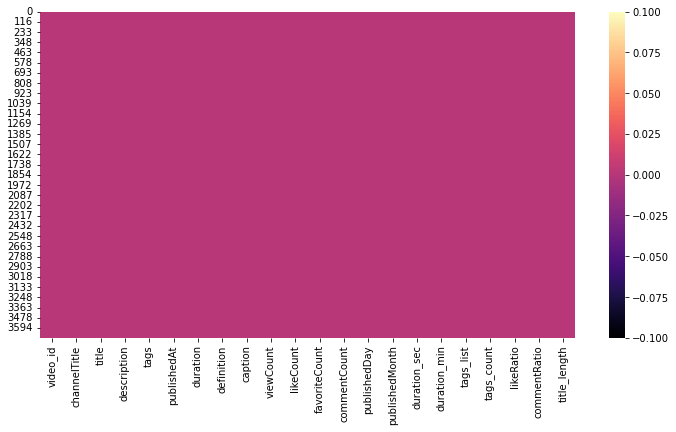

In [115]:
plt.figure(figsize=(12,6))
sns.heatmap(video_df.isnull(),cmap='magma')

In [ ]:
cm_df = read.

## EDA : Channel

In [116]:
ch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype                  
---  ------              --------------  -----                  
 0   channel_title       13 non-null     object                 
 1   channel_desc        13 non-null     object                 
 2   channel_loc         13 non-null     object                 
 3   channel_pub_date    13 non-null     datetime64[ns, tzutc()]
 4   channel_view        13 non-null     int64                  
 5   channel_sub         13 non-null     int64                  
 6   channel_video       13 non-null     int64                  
 7   channel_playlistId  13 non-null     object                 
 8   view_per_video      13 non-null     float64                
dtypes: datetime64[ns, tzutc()](1), float64(1), int64(3), object(4)
memory usage: 1.0+ KB


In [117]:
ch_df.sort_values(by='channel_sub',ascending=False)

channel_title  \
12  Zak George’s Dog Training Revolution   
3                Dog Training by Kikopup   
11                          absoluteDogs   
8                              Dogs That   
2                             Fanny Gott   
9                            OneMindDogs   
5                             Jenny Damm   
7                         Tereza Králová   
1                    McCann Dogs Agility   
6                     Agile Dog Training   
4                         Peak Performer   
10                           Iwona Golab   
0                           PointyFloppy   

                                         channel_desc  channel_loc  \
12  This is the official YouTube channel of me, do...           US   
3   Professional dog training videos created by wo...           US   
11  This is the official YouTube channel of Tom an...           GB   
8   Our DogsThat YouTube Channel is brought to you...           CA   
2                             Clicker training videos  No Location   
9   OneMind Dogs is a dog and agility training met...           FI   
5                                      No Description  No Location   
7                                      No Description  No Location   
1   Kayl McCann is a dog trainer, who has been a m...           CA   
6   Welcome to the Agile Dog Training channel wher...           CA   
4                                      No Description           DE   
10  🌎Agility Worldwide Coach 🏆World Championship M...  No Location   
0   Adventure of border collies with pointy and fl...  No Location   

            channel_pub_date  channel_view  channel_sub  channel_video  \
12 2006-09-05 12:18:21+00:00     272797110      3560000            549   
3  2007-04-06 05:11:22+00:00      41582907       359000            595   
11 2019-09-23 13:57:03+00:00       1021614        47600            235   
8  2019-06-03 19:59:45+00:00       2144385        43900            292   
2  2007-06-25 11:57:39+00:00       1466755         7130            413   
9  2012-08-14 16:25:29+00:00        997018         6390            370   
5  2008-02-09 16:40:29+00:00        796505         5730            175   
7  2007-11-25 20:22:27+00:00        919743         5730            138   
1  2011-09-24 05:57:08+00:00        165573         4590            129   
6  2013-10-11 15:29:30+00:00         55100         2040             13   
4  2007-05-14 19:54:54+00:00        300608         1550            488   
10 2011-10-24 11:26:02+00:00        210751         1430            251   
0  2010-08-07 09:17:37+00:00          2007            9             58   

          channel_playlistId  view_per_video  
12  UUZzFRKsgVMhGTxffpzgTJlQ   496898.196721  
3   UU-qnqaajTk6bfs3UZuue6IQ    69887.238655  
11  UUrz5NqpcLxpiy1Wm_ksEV3g     4347.293617  
8   UUC17PDLl8y1dP2BRV5vuseg     7343.784247  
2   UUqw_HGVtWKcd-owWODwcQsg     3551.464891  
9   UUMF2E-huI3T7meqJBU-olZg     2694.643243  
5   UUwLs3Ldbl1Ox-fvupUq7ipA     4551.457143  
7   UUmLiE85jsHD7tSsfGUoFd1A     6664.804348  
1   UUULyOKD5Y9QTKFDikg2UDgw     1283.511628  
6   UUxsOQBtCjUhYS-j8VYt4KFQ     4238.461538  
4   UUEaf-PDONb_nhyNRmVw9_nA      616.000000  
10  UUxXnIktVdXrSFCE8u1D-26w      839.645418  
0   UUSPfJ89aYsRhpDSnZ0vaFCg       34.603448

We can separate our analysis by channel type based on numbers of subscribers

__Premium tier (sub > 100,000)__ 
- Zak George's Dog Training Revolution
- Dog Training by Kikopup

__Medium tier (10,000 < sub <= 100,000)__
- absoluteDogs
- Dogs That

__Low tier (sub <= 10,000)__
- The rest

In [164]:
ch_df_high = ch_df[ch_df['channel_sub'] > 100000]

In [165]:
ch_df_medium = ch_df[(ch_df['channel_sub'] <= 100000) & (ch_df['channel_sub'] > 10000)]

In [166]:
ch_df_low = ch_df[ch_df['channel_sub'] <= 10000]

Created channel title list (separate tier)

In [167]:
low_ch_title = ch_df_low['channel_title']
medium_ch_title = ch_df_medium['channel_title']
high_ch_title = ch_df_premium['channel_title']

Now we can work with different tiers separately

[Text(0, 0, 'Fanny Gott'),
 Text(1, 0, 'OneMindDogs'),
 Text(2, 0, 'Jenny Damm'),
 Text(3, 0, 'Tereza Králová'),
 Text(4, 0, 'McCann Dogs Agility'),
 Text(5, 0, 'Agile Dog Training'),
 Text(6, 0, 'Peak Performer'),
 Text(7, 0, 'Iwona Golab'),
 Text(8, 0, 'PointyFloppy')]

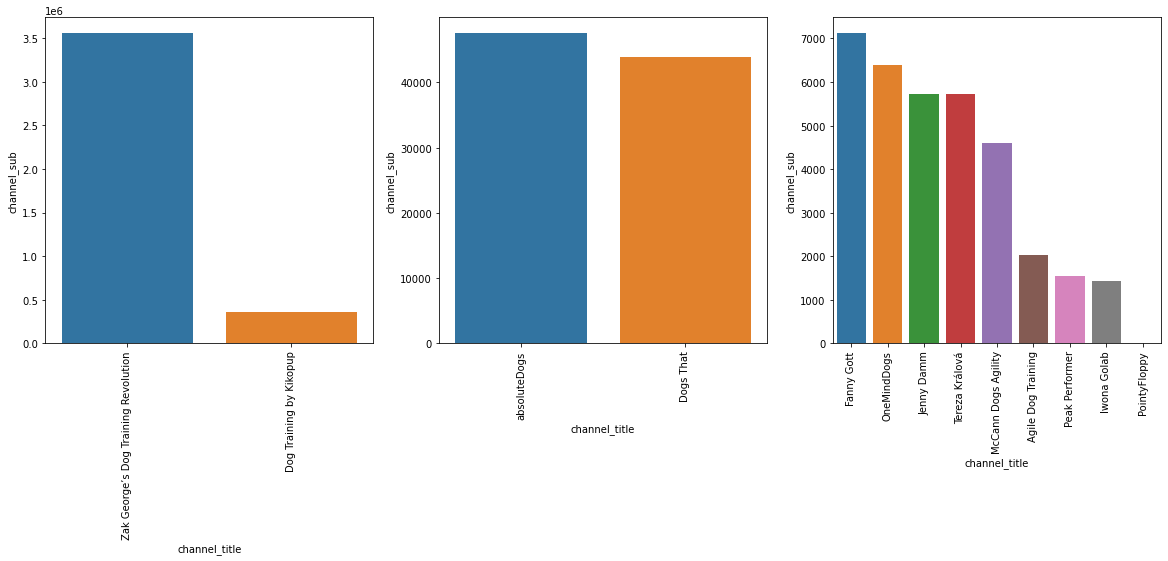

In [168]:
fig, axes = plt.subplots(1, 3,figsize=(20,6))

sns.barplot(ax=axes[0], x='channel_title', y='channel_sub',data=ch_df_premium.sort_values(by='channel_sub',ascending=False))
axes[0].set_xticklabels(ch_df_high.sort_values(by='channel_sub',ascending=False)['channel_title'],rotation = 90)

sns.barplot(ax=axes[1], x='channel_title', y='channel_sub',data=ch_df_medium.sort_values(by='channel_sub',ascending=False))
axes[1].set_xticklabels(ch_df_medium.sort_values(by='channel_sub',ascending=False)['channel_title'],rotation = 90)

sns.barplot(ax=axes[2], x='channel_title', y='channel_sub',data=ch_df_low.sort_values(by='channel_sub',ascending=False))
axes[2].set_xticklabels(ch_df_low.sort_values(by='channel_sub',ascending=False)['channel_title'],rotation = 90)

[Text(0, 0, 'Fanny Gott'),
 Text(1, 0, 'OneMindDogs'),
 Text(2, 0, 'Jenny Damm'),
 Text(3, 0, 'Tereza Králová'),
 Text(4, 0, 'McCann Dogs Agility'),
 Text(5, 0, 'Agile Dog Training'),
 Text(6, 0, 'Peak Performer'),
 Text(7, 0, 'Iwona Golab'),
 Text(8, 0, 'PointyFloppy')]

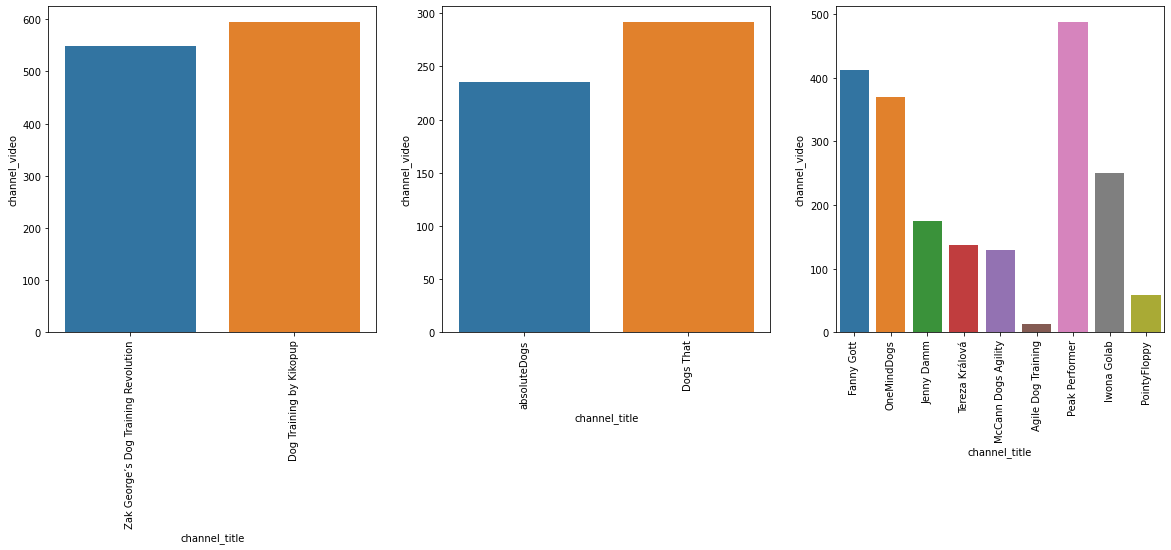

In [169]:
fig, axes = plt.subplots(1, 3,figsize=(20,6))

sns.barplot(ax=axes[0], x='channel_title', y='channel_video',data=ch_df_premium.sort_values(by='channel_sub',ascending=False))
axes[0].set_xticklabels(ch_df_high.sort_values(by='channel_sub',ascending=False)['channel_title'],rotation = 90)

sns.barplot(ax=axes[1], x='channel_title', y='channel_video',data=ch_df_medium.sort_values(by='channel_sub',ascending=False))
axes[1].set_xticklabels(ch_df_medium.sort_values(by='channel_sub',ascending=False)['channel_title'],rotation = 90)

sns.barplot(ax=axes[2], x='channel_title', y='channel_video',data=ch_df_low.sort_values(by='channel_sub',ascending=False))
axes[2].set_xticklabels(ch_df_low.sort_values(by='channel_sub',ascending=False)['channel_title'],rotation = 90)

We will focus on low channel first

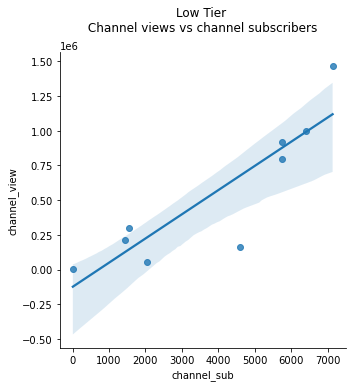

In [161]:
#excluding the top two outliers - we will investigate the channel sub vs channel views
sns.lmplot(x='channel_sub', y='channel_view', data = ch_df_low.sort_values(by='channel_sub',ascending=True)).set(title='Low Tier \n Channel views vs channel subscribers \n')

## EDA : Videos

Separate video data into different tiers

In [175]:
video_df_low = video_df[video_df['channelTitle'].isin(low_ch_title)].drop('favoriteCount',axis=1)

In [176]:
video_df_medium = video_df[video_df['channelTitle'].isin(medium_ch_title)].drop('favoriteCount',axis=1)

In [177]:
video_df_high = video_df[video_df['channelTitle'].isin(high_ch_title)].drop('favoriteCount',axis=1)

[Text(0.5, 1.0, 'Low Tier Feature Correlation')]

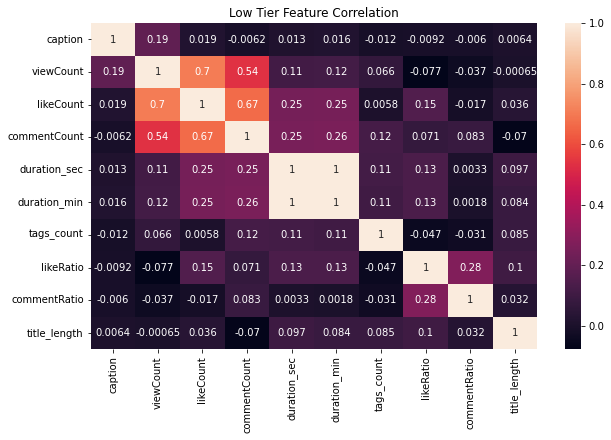

In [184]:
plt.figure(figsize=(10,6))
sns.heatmap(data=video_df_low.corr(),annot=True).set(title='Low Tier Feature Correlation')

[Text(0.5, 1.0, 'Medium Tier Feature Correlation')]

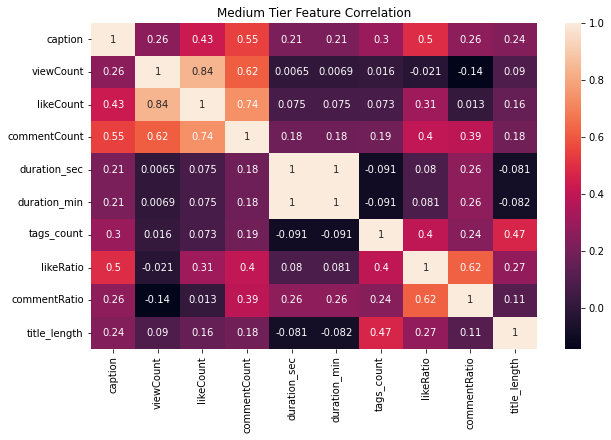

In [185]:
plt.figure(figsize=(10,6))
sns.heatmap(data=video_df_medium.corr(),annot=True).set(title='Medium Tier Feature Correlation')

[Text(0.5, 1.0, 'High Tier Channel Feature Correlation')]

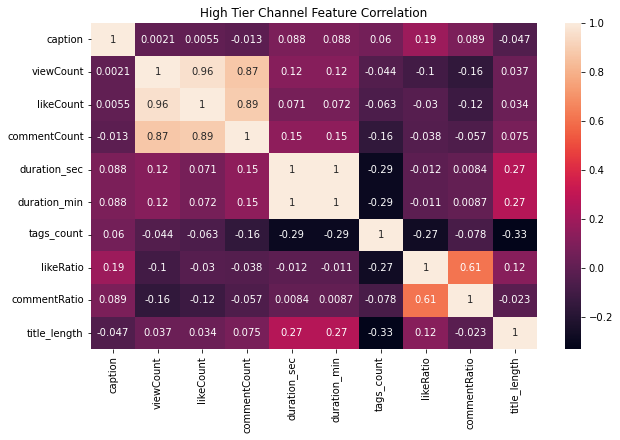

In [186]:
plt.figure(figsize=(10,6))
sns.heatmap(data=video_df_high.corr(),annot=True).set(title='High Tier Channel Feature Correlation')

Check average tags per video per channel

<AxesSubplot:xlabel='channelTitle'>

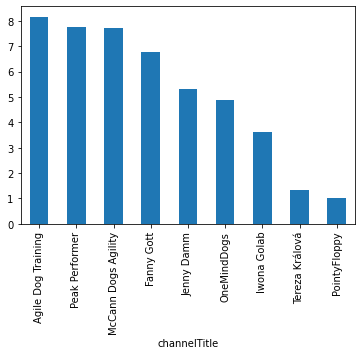

In [187]:
video_df_low.groupby(by='channelTitle').mean()['tags_count'].sort_values(ascending=False).plot(kind='bar')

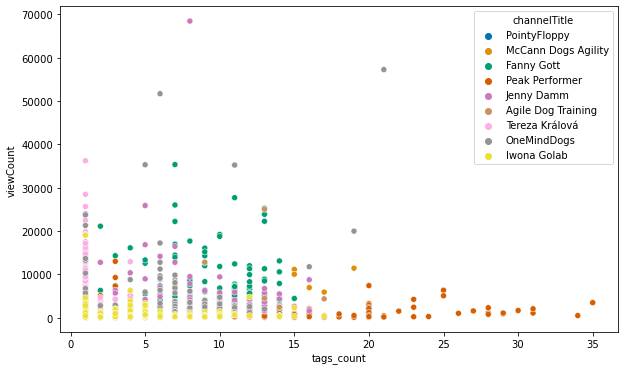

In [188]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='tags_count',y='viewCount',data=video_df_low,hue='channelTitle',palette='colorblind')
sns.move_legend(ax, "upper right",bbox_to_anchor=(1,1))

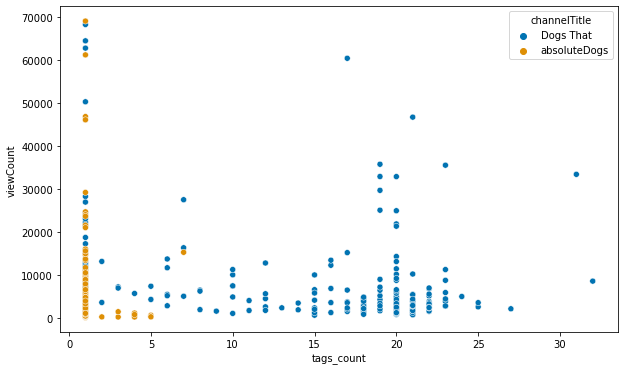

In [189]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='tags_count',y='viewCount',data=video_df_medium,hue='channelTitle',palette='colorblind')
sns.move_legend(ax, "upper right",bbox_to_anchor=(1,1))

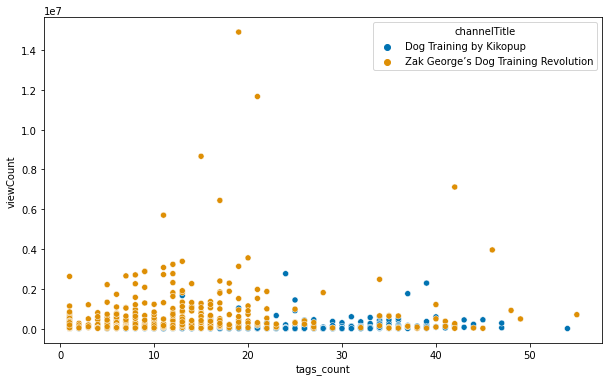

In [190]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='tags_count',y='viewCount',data=video_df_high,hue='channelTitle',palette='colorblind')
sns.move_legend(ax, "upper right",bbox_to_anchor=(1,1))

Investigate relationship between title length and view counts

<AxesSubplot:xlabel='title_length', ylabel='viewCount'>

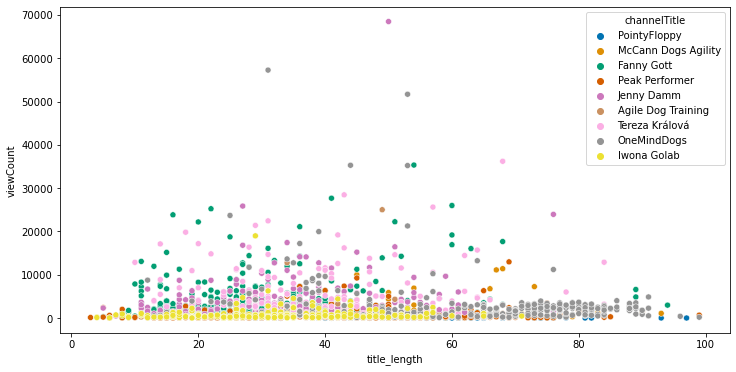

In [192]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='title_length',y='viewCount',data=video_df_low,hue='channelTitle',palette='colorblind')

<AxesSubplot:xlabel='title_length', ylabel='viewCount'>

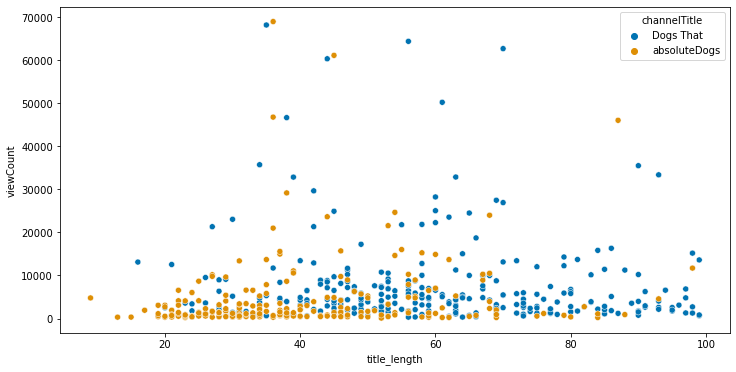

In [193]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='title_length',y='viewCount',data=video_df_medium,hue='channelTitle',palette='colorblind')

<AxesSubplot:xlabel='title_length', ylabel='viewCount'>

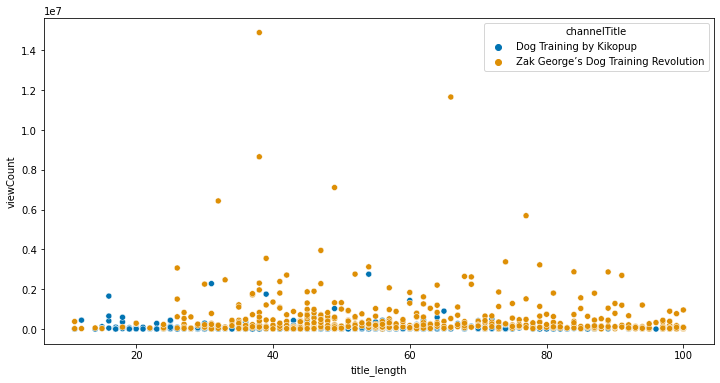

In [194]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='title_length',y='viewCount',data=video_df_high,hue='channelTitle',palette='colorblind')

#### comment count vs view count

<Figure size 864x432 with 0 Axes>

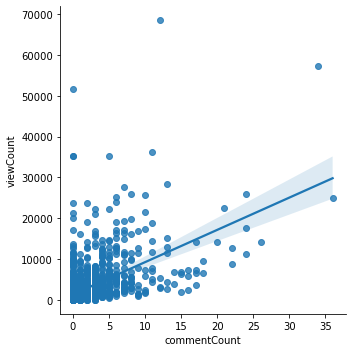

In [195]:
plt.figure(figsize=(12,6))
sns.lmplot(x='commentCount',y='viewCount',data=video_df_low)

<Figure size 864x432 with 0 Axes>

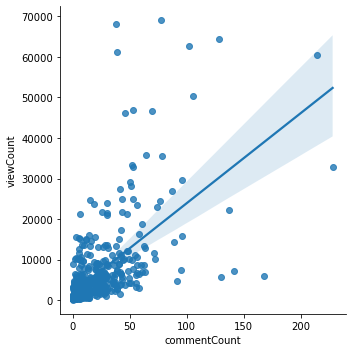

In [196]:
plt.figure(figsize=(12,6))
sns.lmplot(x='commentCount',y='viewCount',data=video_df_medium)

<Figure size 864x432 with 0 Axes>

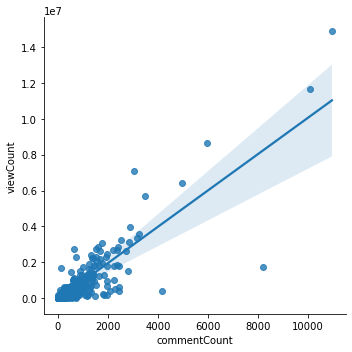

In [197]:
plt.figure(figsize=(12,6))
sns.lmplot(x='commentCount',y='viewCount',data=video_df_high)

observation: seems like there is a trend between view and comment - possibly due to youtube algorithm

<Figure size 864x432 with 0 Axes>

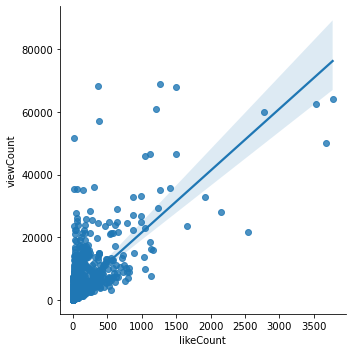

In [60]:
plt.figure(figsize=(12,6))
sns.lmplot(x='likeCount',y='viewCount',data=df_normal)

#### Go back all data

In [198]:
#EDA part

#video duration matter?

#no. of tags - popular tags?

#days in week - note the timezone
#time of the day - note the timezone
#month ?

#things to note
#add more local channels
#positive comments? correlation of comments and title to say which topic is in demand

#can I create a video title suggestion model ?

In [207]:
stop_words = set(stopwords.words('english'))
video_df_low['title_no_stopwords'] = video_df_low['title'].apply(lambda x : [item for item in str(x).split() if item not in stop_words])
video_df_medium['title_no_stopwords'] = video_df_medium['title'].apply(lambda x : [item for item in str(x).split() if item not in stop_words])
video_df_high['title_no_stopwords'] = video_df_high['title'].apply(lambda x : [item for item in str(x).split() if item not in stop_words])

In [208]:
low_title_words = list([a for b in video_df_low['title_no_stopwords'].tolist() for a in b]) #I don't get this
medium_title_words = list([a for b in video_df_medium['title_no_stopwords'].tolist() for a in b]) #I don't get this
high_title_words = list([a for b in video_df_high['title_no_stopwords'].tolist() for a in b]) #I don't get this

In [209]:
low_title_words_str = ' '.join(low_title_words)
medium_title_words_str = ' '.join(medium_title_words)
high_title_words_str = ' '.join(high_title_words)

In [211]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis('off');
    
low_wordcloud = WordCloud(width=2000, 
                      height=1000, 
                      random_state=1, 
                      background_color='black',
                      colormap='magma',
                      collocations=False).generate(low_title_words_str)

medium_wordcloud = WordCloud(width=2000, 
                      height=1000, 
                      random_state=1, 
                      background_color='black',
                      colormap='magma',
                      collocations=False).generate(medium_title_words_str)

high_wordcloud = WordCloud(width=2000, 
                      height=1000, 
                      random_state=1, 
                      background_color='black',
                      colormap='magma',
                      collocations=False).generate(high_title_words_str)

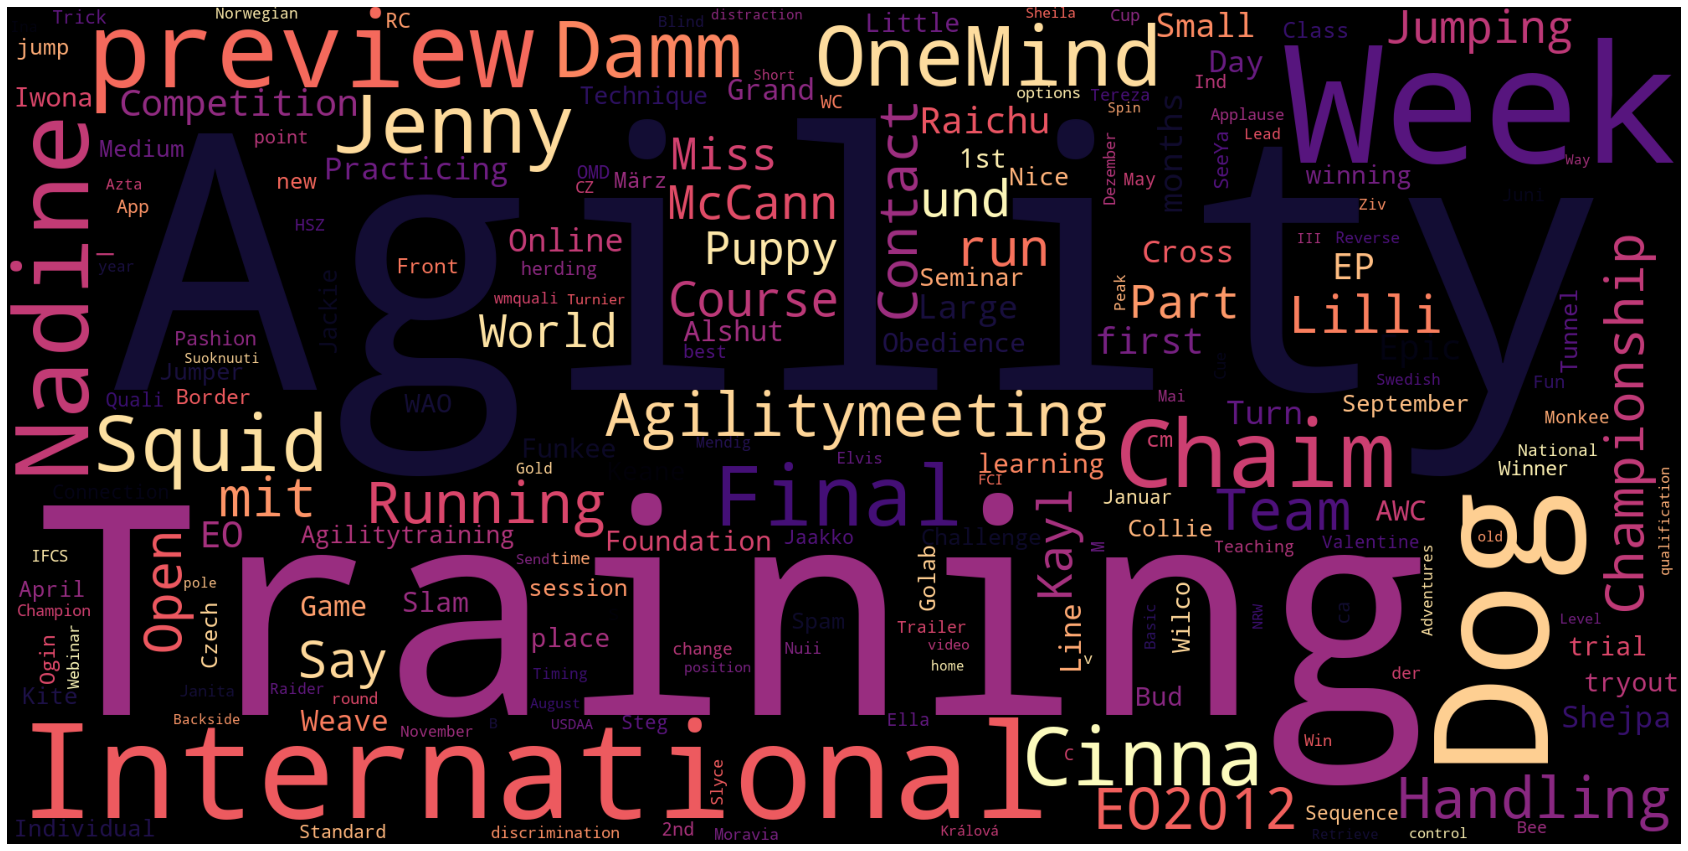

In [212]:
plot_cloud(low_wordcloud)

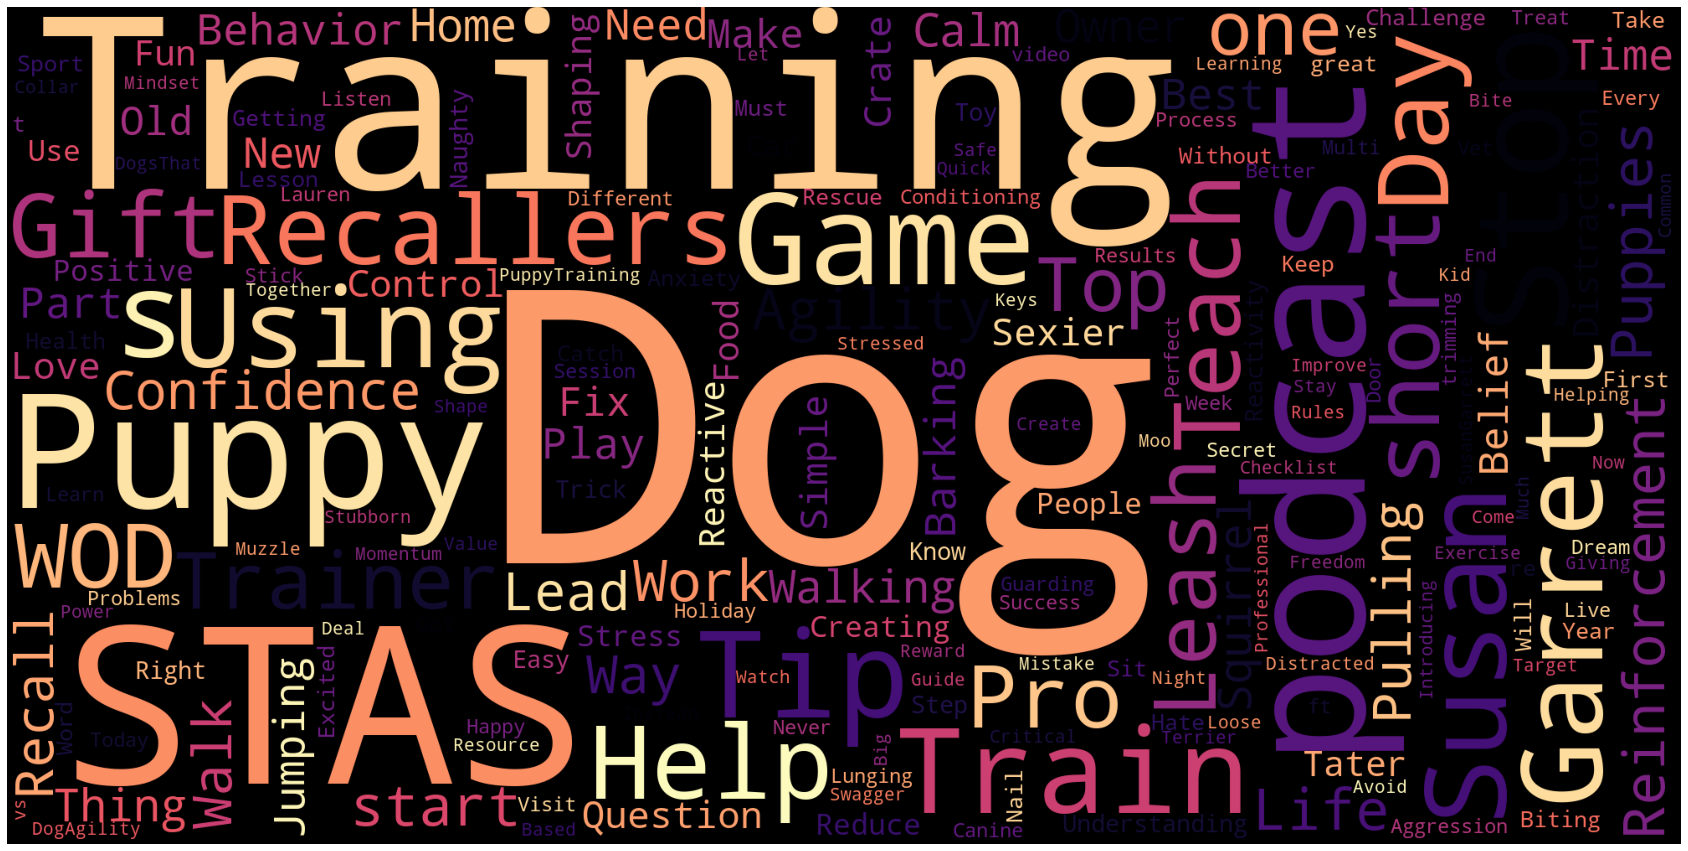

In [213]:
plot_cloud(medium_wordcloud)

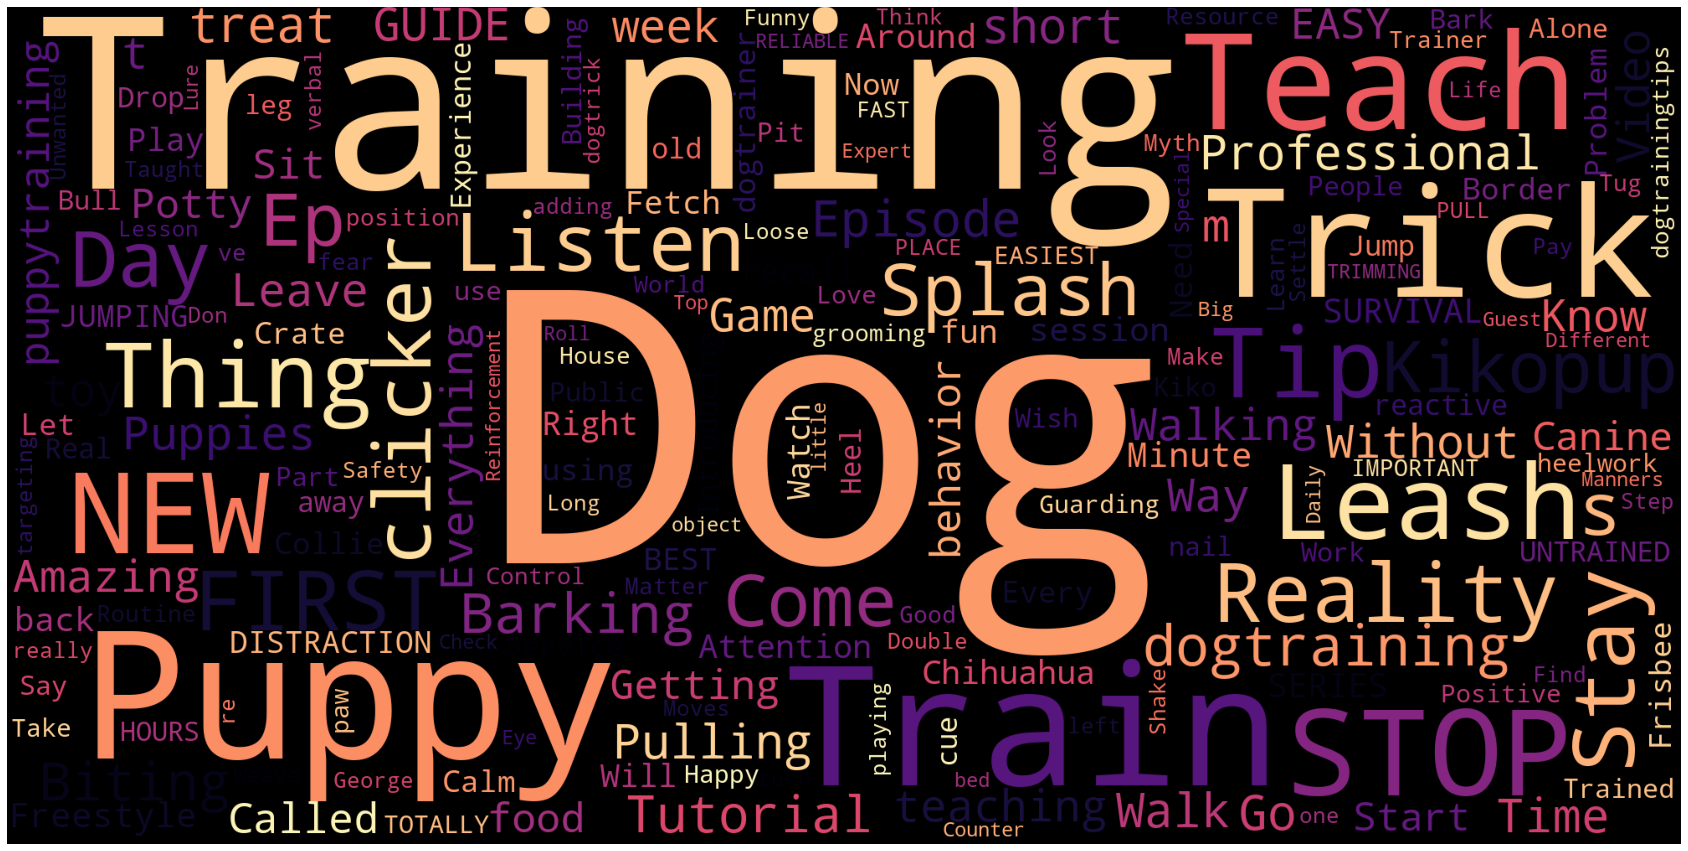

In [214]:
plot_cloud(high_wordcloud)

# EDA : Comments

In [223]:
cm_df = pd.read_csv('comments_df.csv')

In [224]:
cm_df[cm_df['comments'] != '[]']

video_id                                           comments
4     Q7nnSj5Ied8                                      ['Meeeeega!']
6     UmdpFlVH4jQ  ['Poetry in motion.  Congratulations, well des...
8     NUtXSAxE4w8                                        ['𝐩яⓞ𝓂𝓞Ş𝐦']
11    JiHl4OkGDIE  ['so so cool! Gratuliere, so verdient 😍', 'Gra...
15    y736obLiI8E  ['Herzlichen Glückwunsch. Tolle Läufe!', 'apla...
...           ...                                                ...
3637  B6yT0s-auys  ["Thinker and Doer! My corgi will start doing ...
3638  O9hRgEW4844  ['thank you!', 'Great, but what about voice co...
3639  QYyhhf7kr34  ['What a great video!  I will start this "snif...
3640  5friWa4BYXQ  ['👍', "I'm working on better remembering the c...
3641  c8gwuHwhcHQ  ['pls stop rolling the image, it was making me...

[2383 rows x 2 columns]

In [225]:
cm_df['comments_no_stopwords'] = cm_df['comments'].apply(lambda x : [item for item in str(x).split() if item not in stop_words])

In [226]:
cm_words = list([a for b in cm_df['comments_no_stopwords'].tolist() for a in b]) #I don't get this

In [227]:
cm_words_str = ' '.join(cm_words)

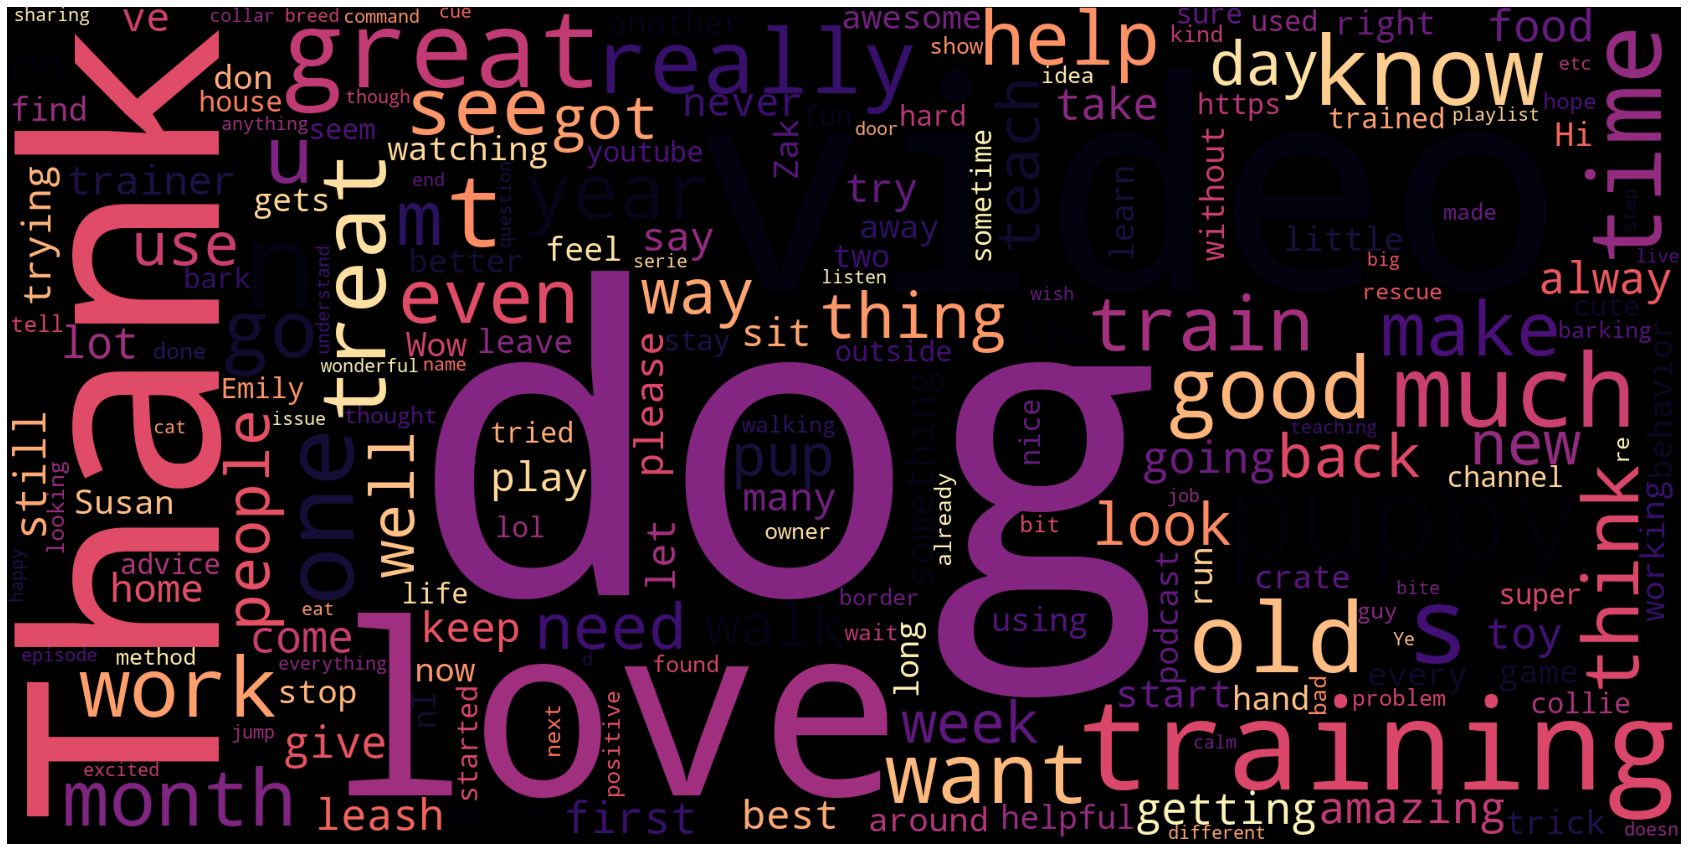

In [228]:
cm_wordcloud = WordCloud(width=2000, 
                      height=1000, 
                      random_state=1, 
                      background_color='black',
                      colormap='magma',
                      collocations=False).generate(cm_words_str)

plot_cloud(cm_wordcloud)

In [229]:
#need to explore differences in comments for each video tier